In [190]:
import numpy as np
from tensorflow import keras
from keras import optimizers
from keras.optimizers import Adam
from keras.models import Sequential 
from keras.layers import Activation, Dropout, Flatten, Dense 
from keras.callbacks import ReduceLROnPlateau
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns

### Utilidades

In [191]:
def plot_loss(history):
    # Plotando os gráficos da Loss por épocas
    leg = ['Treino']
    plt.plot(history.history['loss'])
    if 'val_loss' in history.history:
        leg.append("Validação")
        plt.plot(history.history['val_loss'])
    plt.title('Loss do Modelo')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(leg, loc='upper left')
    plt.grid()
    
def plot_acc(history):
    # Plotando os gráficos da Acurácia por épocas
    leg = ["Treino"]
    plt.plot(history.history['acc'])
    if 'val_acc' in history.history:
        leg.append("Validação")
        plt.plot(history.history['val_acc'])
    plt.title('Acurácia do Modelo')
    plt.ylabel('Acurácia')
    plt.xlabel('Epoch')
    plt.legend(['Treino', 'Validação'], loc='upper left')
    plt.grid()

def plot_clust(frame, id_f1=0, id_f2=1, id_cluster=-1):
    x1 = frame.iloc[:,[id_f1, id_f2, id_cluster]].copy()
    x1.columns = ['feature 1','feature 2','cluster']
    sns.lmplot(x="feature 1", y="feature 2",data=x1, fit_reg=False, hue='cluster', legend=False)

### Importando dados

In [177]:
train = pd.read_csv("./Fashion-MNIST/train.csv")
test = pd.read_csv("./Fashion-MNIST/test.csv")

In [178]:
#Conjunto de treino
X_train = train.loc[:50000-1, train.columns != ('label')]
Y_train = train.loc[:50000-1, train.columns == ('label')]
X_train = X_train.values/255
Y_train = Y_train.values

In [179]:
#Conjunto de validação
X_valid = train.loc[50000:, train.columns != ('label')]
Y_valid = train.loc[50000:, train.columns == ('label')]
X_valid = X_valid.values/255
Y_valid = Y_valid.values

In [180]:
#Conjunto de teste
X_test = test.loc[:, test.columns != ('label')]
Y_test = test.loc[:, test.columns == ('label')]
X_test = X_test.values/255
Y_test = Y_test.values

In [181]:
shape = X_train[0].shape
shape

(784,)

### Baseline

#### Referência: https://www.tensorflow.org/tutorials/keras/classification?hl=pt-br

In [182]:
#Model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=shape),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [183]:
#Resumo da rede
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_17 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [184]:
#Treinando
history_bl = model.fit(X_train, Y_train, epochs=10, validation_data=(X_valid, Y_valid))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 10s 198us/sample - loss: 0.5135 - acc: 0.8193 - val_loss: 0.4837 - val_acc: 0.8310
Epoch 2/10
50000/50000 [==============================] - 10s 190us/sample - loss: 0.3884 - acc: 0.8604 - val_loss: 0.3793 - val_acc: 0.8670
Epoch 3/10
50000/50000 [==============================] - 11s 213us/sample - loss: 0.3493 - acc: 0.8726 - val_loss: 0.3846 - val_acc: 0.8584
Epoch 4/10
50000/50000 [==============================] - 11s 218us/sample - loss: 0.3256 - acc: 0.8802 - val_loss: 0.3429 - val_acc: 0.8756
Epoch 5/10
50000/50000 [==============================] - 10s 196us/sample - loss: 0.3052 - acc: 0.8877 - val_loss: 0.3508 - val_acc: 0.8719
Epoch 6/10
50000/50000 [==============================] - 12s 235us/sample - loss: 0.2914 - acc: 0.8940 - val_loss: 0.3369 - val_acc: 0.8806
Epoch 7/10
50000/50000 [==============================] - 8s 167us/sample - loss: 0.2782 - acc: 0.8973 -

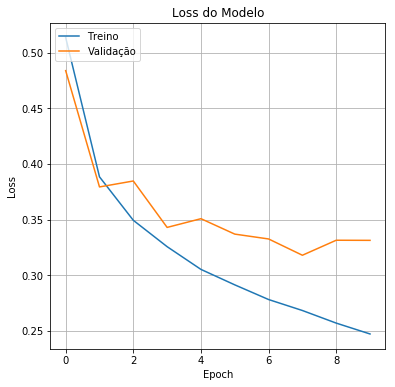

In [185]:
plot_loss(history_bl)

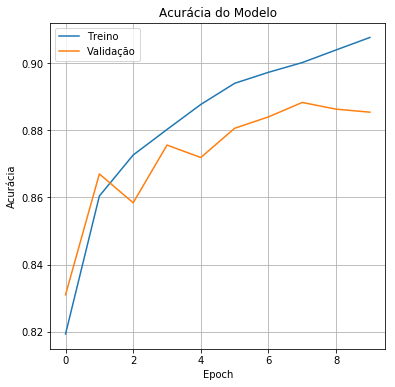

In [186]:
plot_acc(history_bl)

In [187]:
#Acurácia no conjunto de validação
valid_loss, valid_acc = model.evaluate(X_valid,  Y_valid, verbose=2)

print('\nAcurácia na Validação', valid_acc)

 - 1s - loss: 0.3313 - acc: 0.8854

Acurácia na Validação 0.8854


### PCA

#### Referência: https://www.kaggle.com/residentmario/dimensionality-reduction-and-pca-for-fashion-mnist

In [68]:
pca = PCA(n_components=20)
X_r = pca.fit(X_train).transform(X_train)

In [69]:
pca.explained_variance_ratio_, sum(pca.explained_variance_ratio_)

(array([0.29020295, 0.17731916, 0.06033385, 0.04971005, 0.03825331,
        0.03463691, 0.02342805, 0.01924741, 0.01347098, 0.01311681,
        0.0098574 , 0.0091311 , 0.00765573, 0.00658287, 0.00606654,
        0.00591987, 0.00553012, 0.00527817, 0.0045954 , 0.00455235]),
 0.7848890066421175)

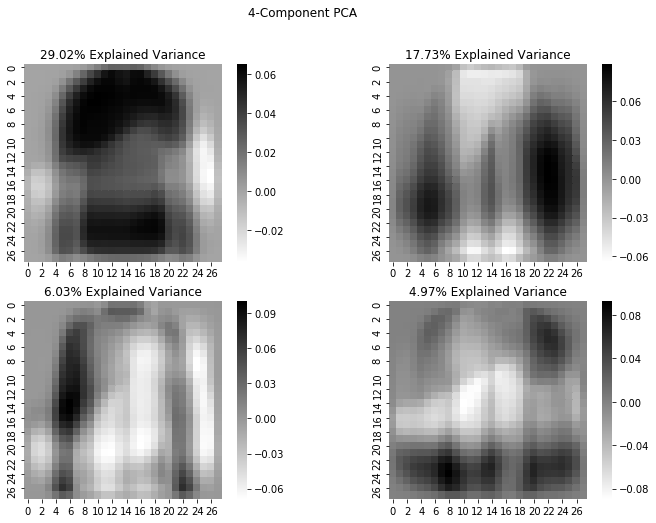

In [70]:
#Variancia obtida em 4 componentes
fig, axarr = plt.subplots(2, 2, figsize=(12, 8))

sns.heatmap(pca.components_[0, :].reshape(28, 28), ax=axarr[0][0], cmap='gray_r')
sns.heatmap(pca.components_[1, :].reshape(28, 28), ax=axarr[0][1], cmap='gray_r')
sns.heatmap(pca.components_[2, :].reshape(28, 28), ax=axarr[1][0], cmap='gray_r')
sns.heatmap(pca.components_[3, :].reshape(28, 28), ax=axarr[1][1], cmap='gray_r')

axarr[0][0].set_title(
    "{0:.2f}% Explained Variance".format(pca.explained_variance_ratio_[0]*100),
    fontsize=12
)
axarr[0][1].set_title(
    "{0:.2f}% Explained Variance".format(pca.explained_variance_ratio_[1]*100),
    fontsize=12
)
axarr[1][0].set_title(
    "{0:.2f}% Explained Variance".format(pca.explained_variance_ratio_[2]*100),
    fontsize=12
)
axarr[1][1].set_title(
    "{0:.2f}% Explained Variance".format(pca.explained_variance_ratio_[3]*100),
    fontsize=12
)
axarr[0][0].set_aspect('equal')
axarr[0][1].set_aspect('equal')
axarr[1][0].set_aspect('equal')
axarr[1][1].set_aspect('equal')

plt.suptitle('4-Component PCA')
pass

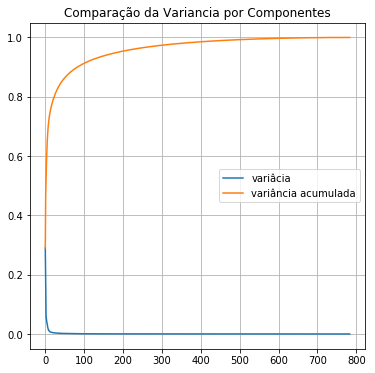

In [73]:
#Comparação de variancia por componentes
pca = PCA(n_components=784)
X_r = pca.fit(X_train).transform(X_train)

plt.plot(range(784), pca.explained_variance_ratio_, label = 'variâcia')
plt.plot(range(784), np.cumsum(pca.explained_variance_ratio_), label = 'variância acumulada')
plt.legend()
plt.grid()
plt.title("Comparação da Variancia por Componentes")
plt.savefig("pca_var.eps")

In [74]:
#Componentes
pca = PCA(n_components=2)
#Aplicando PCA aos dados
X_train_PCA = pca.fit(X_train).transform(X_train)
X_valid_PCA = pca.fit(X_valid).transform(X_valid)

In [75]:
#Modelo PCA
model = keras.Sequential([
    keras.layers.Flatten(input_shape= (X_train_PCA[0].shape)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [76]:
#Treinando com PCA
history_pca = model.fit(X_train_PCA, Y_train, epochs=10, validation_data=(X_valid_PCA, Y_valid))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 4s 80us/sample - loss: 1.2393 - acc: 0.4825 - val_loss: 1.1486 - val_acc: 0.5081
Epoch 2/10
50000/50000 [==============================] - 4s 72us/sample - loss: 1.1348 - acc: 0.5229 - val_loss: 1.1174 - val_acc: 0.5290
Epoch 3/10
50000/50000 [==============================] - 3s 64us/sample - loss: 1.1147 - acc: 0.5356 - val_loss: 1.1078 - val_acc: 0.5365
Epoch 4/10
50000/50000 [==============================] - 3s 64us/sample - loss: 1.1055 - acc: 0.5410 - val_loss: 1.1063 - val_acc: 0.5337
Epoch 5/10
50000/50000 [==============================] - 5s 94us/sample - loss: 1.1006 - acc: 0.5418 - val_loss: 1.1012 - val_acc: 0.5396
Epoch 6/10
50000/50000 [==============================] - 4s 81us/sample - loss: 1.0958 - acc: 0.5437 - val_loss: 1.0942 - val_acc: 0.5466
Epoch 7/10
50000/50000 [==============================] - 3s 70us/sample - loss: 1.0915 - acc: 0.5451 - val_loss: 1.

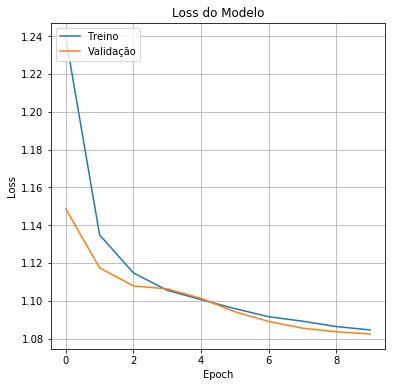

In [77]:
plot_loss(history_pca)
plt.savefig("pca_loss.eps")

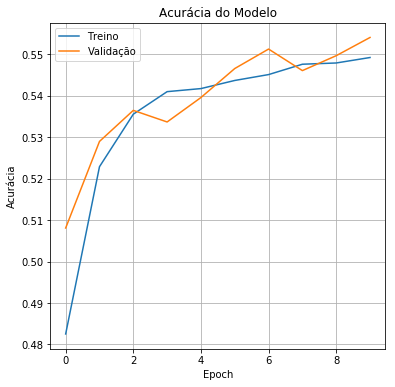

In [78]:
plot_acc(history_pca)
plt.savefig("pca_acc.eps")

### Autoencoder
#### Referência: https://blog.keras.io/building-autoencoders-in-keras.html

In [79]:
from keras.layers import Input, Dense
from keras.models import Model

In [129]:
# Parametros
VECTOR_SIZE = 20
IMAGES_2_DISPLAY = 10

NUM_EPOCHS=20
BATCH_SIZE=256

In [130]:
encoding_dim = VECTOR_SIZE

# Input layer
# 28 * 28 = 784
input_img = Input(shape=(784,))

# encoded = imagem processada
encoded = Dense(encoding_dim, activation='relu')(input_img)

# decoded = reconstrução da imagem
decoded = Dense(784, activation='sigmoid')(encoded)

# Modelo que codifica a imagem (redução)
encoder = Model(input_img, encoded)

In [131]:
# Mapeando entrada na saída
autoencoder = Model(input_img, decoded)

In [132]:
# Modelo para decodificar (reconstrução)
# Agora, a entrada é a imagem codificada
encoded_input = Input(shape=(encoding_dim,))

# E a saída é a ultima camada do nosso auto-encoder
decoder_layer = autoencoder.layers[-1]

# Modelo usado para reconstruir a imagem
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [133]:
# Definindo o modus operandi do modelo
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [134]:
# Treinando o Modelo
autoencoder.fit(X_train, X_train,
                epochs=NUM_EPOCHS,
                batch_size=BATCH_SIZE,
                shuffle=True,
                validation_data=(X_valid, X_valid))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 5s 110us/step - loss: 0.5427 - val_loss: 0.4777
Epoch 2/20
50000/50000 [==============================] - 5s 101us/step - loss: 0.4432 - val_loss: 0.4165
Epoch 3/20
50000/50000 [==============================] - 5s 102us/step - loss: 0.4064 - val_loss: 0.3965
Epoch 4/20
50000/50000 [==============================] - 5s 107us/step - loss: 0.3906 - val_loss: 0.3824
Epoch 5/20
50000/50000 [==============================] - 5s 105us/step - loss: 0.3768 - val_loss: 0.3695
Epoch 6/20
50000/50000 [==============================] - 5s 108us/step - loss: 0.3651 - val_loss: 0.3590
Epoch 7/20
50000/50000 [==============================] - 5s 109us/step - loss: 0.3556 - val_loss: 0.3508
Epoch 8/20
50000/50000 [==============================] - 5s 107us/step - loss: 0.3482 - val_loss: 0.3443
Epoch 9/20
50000/50000 [==============================] - 5s 102us/step - loss: 0.3422 - val_loss: 0.3

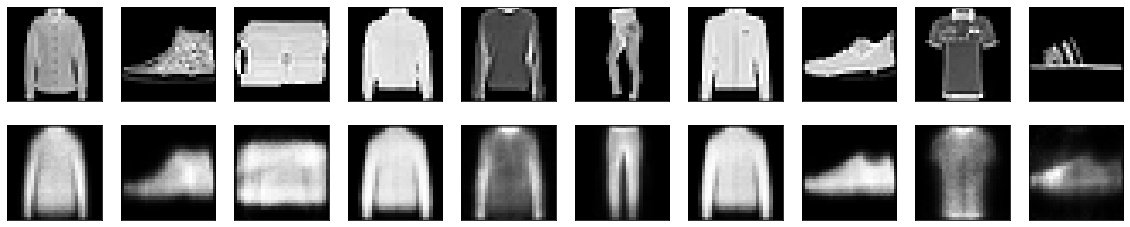

In [135]:
# Avaliando o Modelo

# Entrada = Conjunto de validação
encoded_imgs = encoder.predict(X_valid)
decoded_imgs = decoder.predict(encoded_imgs)

# Plot da imagem original e da reconstruída
n = IMAGES_2_DISPLAY
plt.figure(figsize=(20, 4))
for i in range(n):
    # original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_valid[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # reconstruída
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [136]:
# Usando o auto-encoder no baseline

# Criando o modelo
enc_shape = encoded_imgs[0].shape
model_autoenc = keras.Sequential([
    keras.layers.Flatten(input_shape=enc_shape),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model_autoenc.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [137]:
# Parametros
NUM_EPOCHS=20
BATCH_SIZE=256

In [138]:
# Treinando
history_ae = model_autoenc.fit(x=encoder.predict(X_train), y = Y_train,
                 epochs=NUM_EPOCHS,
                 batch_size=BATCH_SIZE,
                 validation_data = (encoder.predict(X_valid), Y_valid))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 1s 18us/sample - loss: 1.0475 - acc: 0.6590 - val_loss: 0.6885 - val_acc: 0.7493
Epoch 2/20
50000/50000 [==============================] - 1s 13us/sample - loss: 0.6335 - acc: 0.7694 - val_loss: 0.6123 - val_acc: 0.7741
Epoch 3/20
50000/50000 [==============================] - 1s 12us/sample - loss: 0.5895 - acc: 0.7824 - val_loss: 0.5809 - val_acc: 0.7834
Epoch 4/20
50000/50000 [==============================] - 1s 11us/sample - loss: 0.5617 - acc: 0.7925 - val_loss: 0.5554 - val_acc: 0.7933
Epoch 5/20
50000/50000 [==============================] - 1s 10us/sample - loss: 0.5399 - acc: 0.7997 - val_loss: 0.5509 - val_acc: 0.7936
Epoch 6/20
50000/50000 [==============================] - 1s 11us/sample - loss: 0.5281 - acc: 0.8039 - val_loss: 0.5392 - val_acc: 0.8034
Epoch 7/20
50000/50000 [==============================] - 1s 11us/sample - loss: 0.5178 - acc: 0.8072 - val_loss: 0.

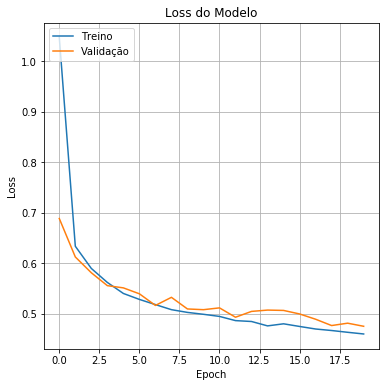

In [139]:
plot_loss(history_ae)
plt.savefig("ae20_loss.eps")

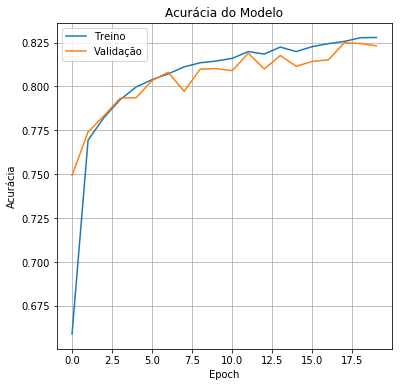

In [140]:
plot_acc(history_ae)
plt.savefig("ae20_acc.eps")

In [141]:
#Acurácia
enc_valid_loss, enc_valid_acc = model_autoenc.evaluate(encoder.predict(X_valid),  Y_valid, verbose=2)

print('\nAcurácia na Validação:', enc_valid_acc)

 - 0s - loss: 0.4748 - acc: 0.8231

Acurácia na Validação: 0.8231


### Clusterização

#### Referência: https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/

In [142]:
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

In [143]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix')

    print(cm)
    
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [144]:
#Usar auto encoder ou PCA aparentemente não melhora
X_train = X_train_PCA
#X_train = encoder.predict(X_train)

In [145]:
X_train.shape

(50000, 2)

In [146]:
#Utilizando K Means com 10 clusters
kmeans = KMeans(n_clusters=10)
kmeans.fit(X_train)
kmeans.inertia_

129621.98011730502

In [147]:
pred = kmeans.predict(X_train)
frame = pd.DataFrame(X_train)
frame['cluster'] = pred
frame['cluster'].value_counts()

3    7289
5    5926
7    5216
1    5178
8    5064
4    4987
2    4710
0    4268
6    4246
9    3116
Name: cluster, dtype: int64

In [148]:
pred = frame.loc[:, frame.columns == ('cluster')]
pred = pred.values

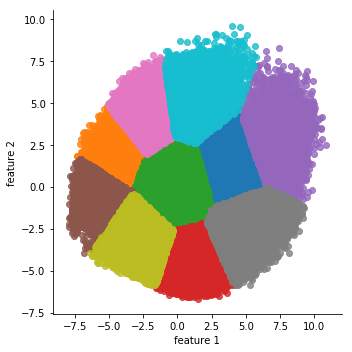

In [149]:
# Plotar o resultado da clusterização
# Fica melhor visivel se reduzirmos usando o encoder para um vetor de tamanho 2
plot_clust(frame)
plt.savefig("kclust.eps")

In [150]:
accuracy = sum(pred == Y_train)/(float(len(Y_train)))
accuracy

array([0.19716])

Confusion matrix
[[ 166   10  298  857  179   41    3 2440  992   13]
 [  36    0   39 3631   17    1    2  174 1098    6]
 [1307   32 1220   15 1792  124    3   96  373   34]
 [  60    0  136 2301   31    2    0 1194 1257    2]
 [1438    4  613  200 1741   58    2  637  269   41]
 [   5 1494   86    1    0 3193  203    1   36   10]
 [ 932   24 1118  274 1018  150   11  660  784   43]
 [   1 2446    1    0    0 2185  354    0    0   10]
 [ 216  330  975   10  207  123  881   14  248 1979]
 [ 107  838  224    0    2   49 2787    0    7  978]]


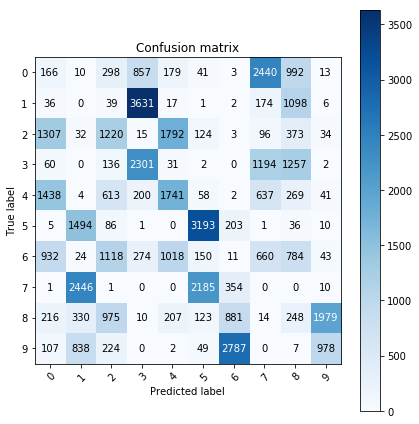

In [151]:
plt.rcParams['figure.figsize'] = [6, 6]
plot_confusion_matrix(Y_train, pred, np.unique(Y_train),
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues)
plt.savefig("kmeans_raw.eps")

### Mini-Batch Key Means

In [159]:
from sklearn.cluster import MiniBatchKMeans

In [160]:
# Parametros
NUM_BATCHES=100

In [161]:
mb_kmeans = MiniBatchKMeans(n_clusters=10, batch_size=NUM_BATCHES)
mb_kmeans.fit(X_train)
mb_kmeans.inertia_

135276.90728441242

In [162]:
#Usar auto encoder ou PCA aparentemente não melhora
X_train = X_train_PCA
#X_train = encoder.predict(X_train)

In [163]:
pred = mb_kmeans.predict(X_train)
frame = pd.DataFrame(X_train)
frame['cluster'] = pred
frame['cluster'].value_counts()

9    6638
3    6236
8    5869
0    5058
1    4876
2    4839
5    4373
6    4307
4    4102
7    3702
Name: cluster, dtype: int64

In [164]:
pred = frame.loc[:, frame.columns == ('cluster')]
pred = pred.values

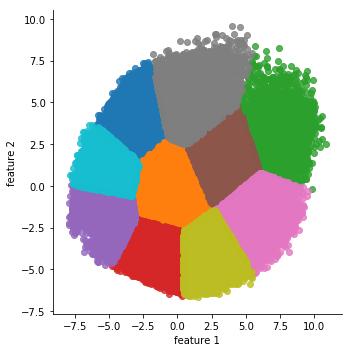

In [165]:
plot_clust(frame)
plt.savefig("mkclust.eps")

In [166]:
accuracy = sum(pred == Y_train)/(float(len(Y_train)))
accuracy

array([0.09464])

Confusion matrix
[[   4  324  128  946  277  164 2046   10 1089   11]
 [   1   42   18 2800   37   36   79    6 1985    0]
 [   4 1266 1781   59  293 1320  180   26   19   48]
 [   0  158   21 1785  155   51  668    1 2144    0]
 [   2  608 1675  179  138 1368  727   28  267   11]
 [ 461  100    0    1 2006    8    0   23    2 2428]
 [  12 1228  993  348  462  945  597   39  355   35]
 [ 908    2    0    0  606    1    0   16    0 3464]
 [ 742  962  220  118  105  315    9 2216    8  288]
 [2924  186    3    0   23  165    1 1337    0  353]]


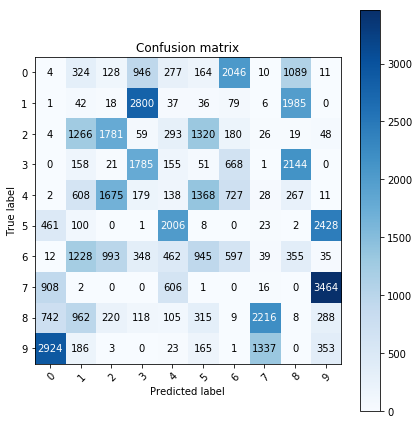

In [168]:
plt.rcParams['figure.figsize'] = [6, 6]
plot_confusion_matrix(Y_train, pred, np.unique(Y_train),
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues)
plt.savefig("cmat_mb.eps")

### Rodando a CNN do Baseline (Melhor Modelo) no Conjunto de Teste

In [188]:
#Acurácia no conjunto de teste
test_loss, test_acc = model.evaluate(X_test,  Y_test, verbose=2)

print('\nAcurácia na Validação', test_acc)

 - 0s - loss: 0.3160 - acc: 0.8856

Acurácia na Validação 0.8856
